# Imports

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

# Segmentação e Classificação

## Limiar

In [16]:
img = cv.imread('./img/estrada.png', 0)

In [17]:
# Limiar Descricionario (média)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Limiar de OTSU
ret, th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Cria imagem com limiar Gaussiano
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

In [18]:
titles = [ '(a) Imagem Original em tons de cinza',

'(b)Limiar Global (v = 127)',

'(c) Limiar de Otsu',

'(d) Limiar Gaussiano']

images = [img, th1, th2, th3] # Define as imagens a serem plotadas

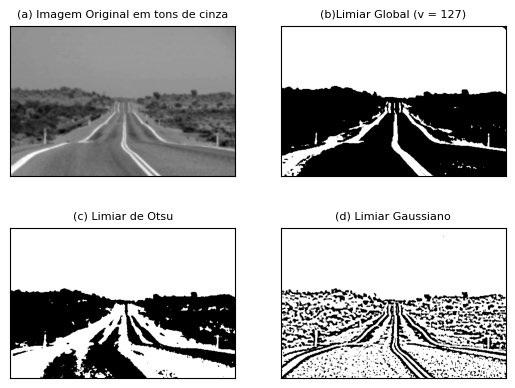

In [20]:
for i in range(4): # For para plotar todas as imagens
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]),plt.yticks([])
plt.show()

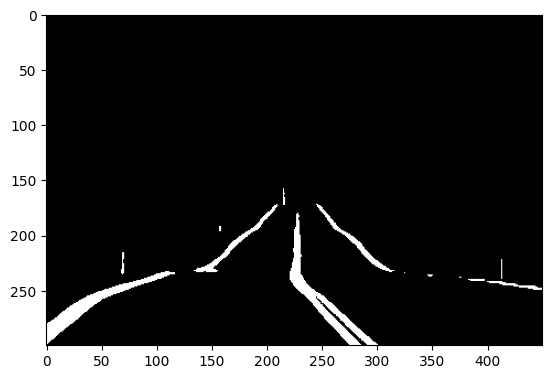

In [21]:
ret, faixas = cv.threshold(img,150,255,cv.THRESH_BINARY)
plt.imshow(faixas, 'gray')

## Agrupamento

In [23]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # Conversão de cores
Z = img.reshape((-1,3)) # Conversão de canais para carregamento e manipulacao

# Conversão para 32bit (Níveis de cinza de cda canal)
Z = np.float32(Z)

# Definição de critérios, como iterações e centros
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Define os títulos do plot
titles = ['(a) k=2', '(b) k=4', '(c) k=8', '(d) k=16']
ks = [2, 4, 8, 16] # Define os números de grupos
images = [0,0,0,0] # Inicializa o vetor das 4 imagens

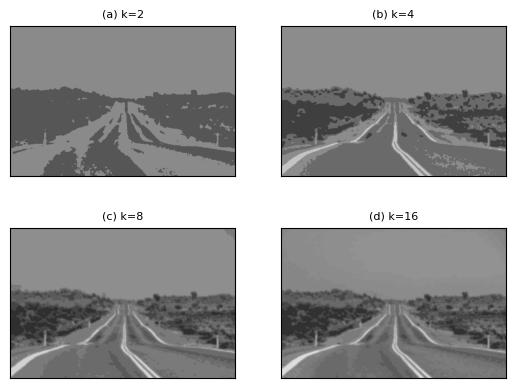

In [24]:
for i in range(4): # For para plotar todas as imagens
    ## Kmeans
    # Define o número de partições
    K = ks[i]
    
    # Executa o KMeans em cada imagem
    ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
    
    ## Reconstrução de canais de cor
    center = np.uint8(center) # Conversão de cores para exibição
    res = center[label.flatten()] # Definição de centros
    images[i] = res.reshape((img.shape)) # Reconstrução de canais
    
    ## Plot
    
    # Define cada plot em seu lugar
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i], fontsize=8)
    plt.xticks([]),plt.yticks([])

plt.show() # Plota o resultado final 

## Feature Matching

In [28]:
img1 = cv.imread('./img/ferrari1.png',cv.IMREAD_GRAYSCALE) # Carrega imagem 1
img2 = cv.imread('./img/ferrari2.jpg',cv.IMREAD_GRAYSCALE) # Carrega imagem 2

In [29]:
# Cria o objeto contendo o algorítmo ORB
orb = cv.ORB_create()

# Encontrar os Keypoints e Descriptors utilizando ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Feature Matching
matches = bf.match(des1,des2)

# Organiza os Matches pela distância (semelhança)
matches = sorted(matches, key = lambda x:x.distance)

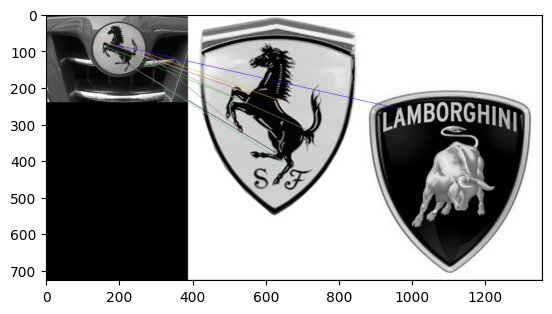

(<matplotlib.image.AxesImage at 0x1b4c9e1c950>, None)

In [30]:
# Desenha as 15 melhores matches e guarda em uma imagem só
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

## Feature Extraction

In [20]:
#imgInput = cv.imread('./img/ferrari.png',0)
#imgInput = cv.imread('./img/guitar.png',0)
#imgInput = cv.imread('./img/merca.jpg',0)
#imgInput = cv.imread('./img/moto.jpg',0)
imgInput = cv.imread('./img/tapete.jpg',0)

imgInput = cv.cvtColor(imgInput, cv.COLOR_RGB2BGR)

In [21]:
# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(imgInput,None)


# compute the descriptors with ORB
kp, des = orb.compute(imgInput, kp)

# draw only keypoints location,not size and orientation
imgOutput = cv.drawKeypoints(imgInput, kp, None, color=(0,255,0), flags=0)

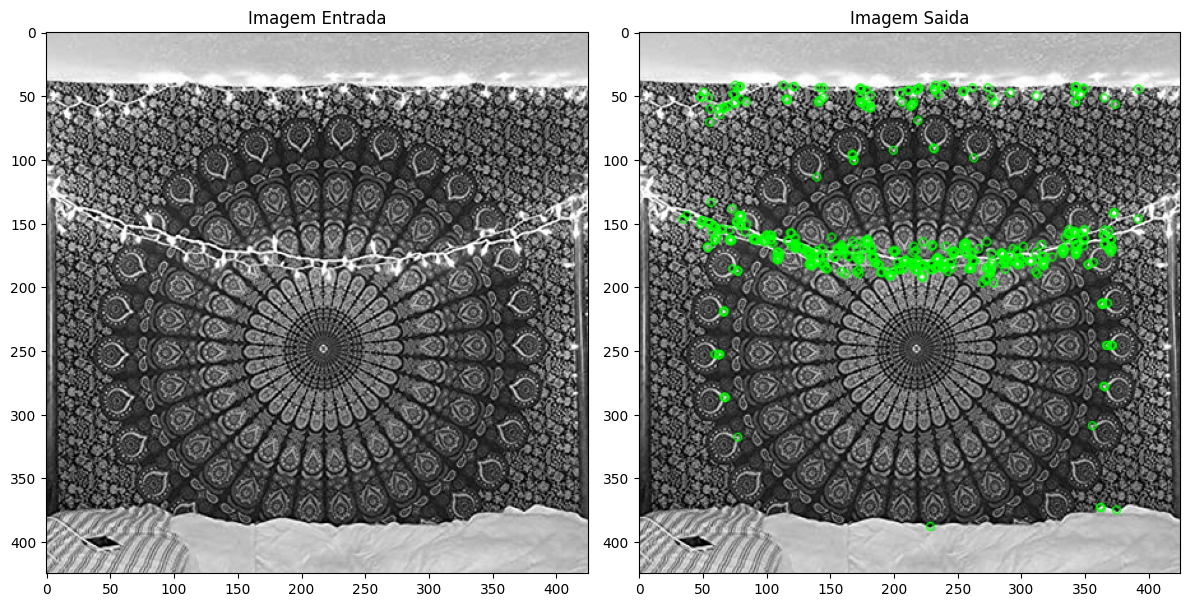

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imgInput)
plt.title('Imagem Entrada')

plt.subplot(1, 2, 2)
plt.imshow(imgOutput)
plt.title('Imagem Saida')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()
